In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.nn import Module, Parameter
import torch.optim as optim
import math

In [14]:
class Distribution(Module):
    
    def __init__(self):
        super(Distribution, self).__init__()
        
    def log_prob(self, x):
        raise NotImplementedError("Log Prob Not Allowed")
        
    def sample(self):
        raise NotImplementedError("Sampling Not Allowed")
        

In [401]:
class Normal(Distribution):
    
    def __init__(self, means=None, stds=None, dims=1):
        super(Normal, self).__init__()
        if means is None:
            self.mu = Parameter(torch.Tensor(1, dims).uniform_(-1, 1))
        else:
            self.mu = means
        if stds is None:
            self.std = Parameter(torch.Tensor(1, dims).uniform_(0, 1))
        else:
            self.std = stds
        
    def log_prob(self, x):
        prob = torch.exp(-((x-self.mu)**2) / (2*(self.std**2)))
        prob = (1.0 / torch.sqrt(2 * math.pi * (self.std**2))) * prob
        return torch.log(prob+1e-10)
    
    def _sample(self):
        return self.mu + self.std * torch.randn(self.std.size())
    
    def sample(self, n=1):
        return torch.cat([self._sample() for _ in range(n)])

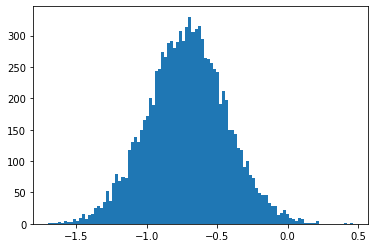

In [402]:
n = Normal(dims=1)
plt.hist([n.sample().item() for _ in range(10000)], bins=100)
# values = np.array([n.sample().detach().numpy()[0] for _ in range(1000)])
# plt.plot(n.sample()
# plt.scatter(values[:, 0], values[:, 1])
plt.show()

In [403]:
def ForwardKL(samples, distribution):
    return -distribution.log_prob(samples).sum()

In [404]:
model = Normal(dims=1)
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [405]:
samples = torch.normal(mean=torch.zeros(64).fill_(-2.5), 
                       std=torch.ones(64).fill_(6.0))

In [406]:
# model.log_prob(samples)

In [ ]:
for i in range(1500):
    optimizer.zero_grad()

    loss = ForwardKL(samples, model)
    loss.backward()
    optimizer.step()
    if i % 100 == 0:
        print(f"Epoch {i} Loss: {loss.item():.3f}")

Epoch 0 Loss: 790.093
Epoch 100 Loss: 424.128
Epoch 200 Loss: 327.702
Epoch 300 Loss: 274.807
Epoch 400 Loss: 249.329
Epoch 500 Loss: 235.703
Epoch 600 Loss: 227.191
Epoch 700 Loss: 221.405
Epoch 800 Loss: 217.258
Epoch 900 Loss: 214.173


In [376]:
print(model.mu, model.std)

Parameter containing:
tensor([[-2.5851]], requires_grad=True) Parameter containing:
tensor([[5.1270]], requires_grad=True)


In [377]:
class Normal_No_Sample(Distribution):
    
    def __init__(self, means=None, stds=None, dims=1):
        super(Normal_No_Sample, self).__init__()
        if means is None:
            self.mu = Parameter(torch.Tensor(1, dims).uniform_(-1, 1))
        else:
            self.mu = means
        if stds is None:
            self.std = Parameter(torch.Tensor(1, dims).uniform_(0, 1))
        else:
            self.std = stds
        
    def log_prob(self, x):
        prob = torch.exp(-((x-self.mu)**2) / (2*(self.std**2)))
        prob = (1.0 / torch.sqrt(2 * math.pi * (self.std**2))) * prob
        return torch.log(prob+1e-10)

In [394]:
truth = Normal_No_Sample()
model = Normal()

print(truth.mu, truth.std)
print(model.mu, model.std)

Parameter containing:
tensor([[5.]], grad_fn=<CopySlices>) Parameter containing:
tensor([[2.]], grad_fn=<CopySlices>)
Parameter containing:
tensor([[0.7807]], requires_grad=True) Parameter containing:
tensor([[0.1378]], requires_grad=True)


In [395]:
def ReverseKL(q, p, batch_size=64):
    samples = q.sample(batch_size)
    return -(p.log_prob(samples) - q.log_prob(samples)).sum()
    

In [396]:
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [397]:
for i in range(1500):
    optimizer.zero_grad()

    loss = ReverseKL(model, truth)
    loss.backward()
    optimizer.step()
    if i % 100 == 0:
        print(f"Epoch {i} Loss: {loss.item():.3f}")

RuntimeError: leaf variable has been moved into the graph interior

In [398]:
print(truth.mu, truth.std)
print(model.mu, model.std)

Parameter containing:
tensor([[5.]], grad_fn=<CopySlices>) Parameter containing:
tensor([[2.]], grad_fn=<CopySlices>)
Parameter containing:
tensor([[0.7807]], requires_grad=True) Parameter containing:
tensor([[0.1378]], requires_grad=True)
